In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-disease-dataset/heart_disease.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/heart-disease-dataset/heart_disease.csv")

In [4]:
data.head()


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
0,Male,39,postgraduate,0,0.0,0.0,no,0,0,195.0,106.0,70.0,26.97,80.0,77.0,No
1,Female,46,primaryschool,0,0.0,0.0,no,0,0,250.0,121.0,81.0,28.73,95.0,76.0,No
2,Male,48,uneducated,1,20.0,0.0,no,0,0,245.0,127.5,80.0,25.34,75.0,70.0,No
3,Female,61,graduate,1,30.0,0.0,no,1,0,225.0,150.0,95.0,28.58,65.0,103.0,yes
4,Female,46,graduate,1,23.0,0.0,no,0,0,285.0,130.0,84.0,23.10,85.0,85.0,No


In [5]:
data.tail()


,Gender,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,Heart_ stroke
4233,Male,50,uneducated,1,1.0,0.0,no,1,0,313.0,179.0,92.0,25.97,66.0,86.0,yes
4234,Male,51,graduate,1,43.0,0.0,no,0,0,207.0,126.5,80.0,19.71,65.0,68.0,No
4235,Female,48,primaryschool,1,20.0,NaN,no,0,0,248.0,131.0,72.0,22.00,84.0,86.0,No
4236,Female,44,uneducated,1,15.0,0.0,no,0,0,210.0,126.5,87.0,19.16,86.0,NaN,No
4237,Female,52,primaryschool,0,0.0,0.0,no,0,0,269.0,133.5,83.0,21.47,80.0,107.0,No


In [6]:
data.shape

(4238, 16)

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           4238 non-null   object 
 1   age              4238 non-null   int64  
 2   education        4133 non-null   object 
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   object 
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  Heart_ stroke    4238 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.9+ KB


In [8]:
data2 = data.dropna()


In [9]:
data2.shape

(3656, 16)

In [10]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3656 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3656 non-null   object 
 1   age              3656 non-null   int64  
 2   education        3656 non-null   object 
 3   currentSmoker    3656 non-null   int64  
 4   cigsPerDay       3656 non-null   float64
 5   BPMeds           3656 non-null   float64
 6   prevalentStroke  3656 non-null   object 
 7   prevalentHyp     3656 non-null   int64  
 8   diabetes         3656 non-null   int64  
 9   totChol          3656 non-null   float64
 10  sysBP            3656 non-null   float64
 11  diaBP            3656 non-null   float64
 12  BMI              3656 non-null   float64
 13  heartRate        3656 non-null   float64
 14  glucose          3656 non-null   float64
 15  Heart_ stroke    3656 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 485.6+ KB


In [11]:
data3 = data.isnull().sum()
data3

Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
Heart_ stroke        0
dtype: int64

In [12]:
data['glucose'].describe()


count    3850.000000
mean       81.966753
std        23.959998
min        40.000000
25%        71.000000
50%        78.000000
75%        87.000000
max       394.000000
Name: glucose, dtype: float64

<AxesSubplot:>

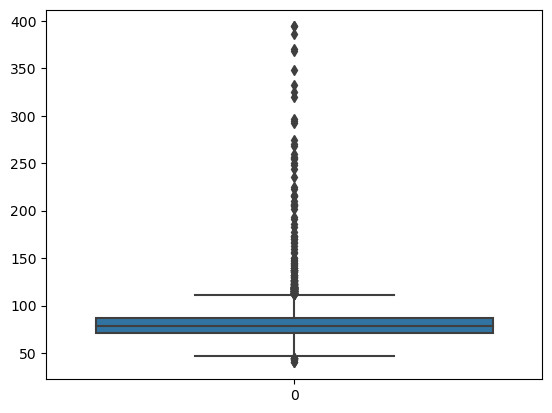

In [13]:
sns.boxplot(data['glucose'])


In [14]:
data['glucose'] = data['glucose'].fillna(data['glucose'].mean())


In [15]:
data.isnull().sum()


Gender               0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose              0
Heart_ stroke        0
dtype: int64

In [16]:
data = data.dropna()


In [17]:
data.isnull().sum()


Gender             0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
Heart_ stroke      0
dtype: int64

In [18]:
data.shape


(3987, 16)

In [19]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3987 non-null   object 
 1   age              3987 non-null   int64  
 2   education        3987 non-null   object 
 3   currentSmoker    3987 non-null   int64  
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   object 
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  Heart_ stroke    3987 non-null   object 
dtypes: float64(8), int64(4), object(4)
memory usage: 529.5+ KB


In [20]:
data4 = data.drop(['Gender','education','prevalentStroke'],axis=1)


In [21]:
data4.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 4237
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            3987 non-null   int64  
 1   currentSmoker  3987 non-null   int64  
 2   cigsPerDay     3987 non-null   float64
 3   BPMeds         3987 non-null   float64
 4   prevalentHyp   3987 non-null   int64  
 5   diabetes       3987 non-null   int64  
 6   totChol        3987 non-null   float64
 7   sysBP          3987 non-null   float64
 8   diaBP          3987 non-null   float64
 9   BMI            3987 non-null   float64
 10  heartRate      3987 non-null   float64
 11  glucose        3987 non-null   float64
 12  Heart_ stroke  3987 non-null   object 
dtypes: float64(8), int64(4), object(1)
memory usage: 436.1+ KB


In [22]:
data['education']


0        postgraduate
1       primaryschool
2          uneducated
3            graduate
4            graduate
            ...      
4232       uneducated
4233       uneducated
4234         graduate
4236       uneducated
4237    primaryschool
Name: education, Length: 3987, dtype: object

In [23]:
data['education'].value_counts()


uneducated       1654
primaryschool    1210
graduate          664
postgraduate      459
Name: education, dtype: int64

In [24]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

In [25]:
data['education']= label_encoder.fit_transform(data['education'])

In [26]:
data['education']


0       1
1       2
2       3
3       0
4       0
       ..
4232    3
4233    3
4234    0
4236    3
4237    2
Name: education, Length: 3987, dtype: int64

In [27]:
data['education'].value_counts()


3    1654
2    1210
0     664
1     459
Name: education, dtype: int64

In [28]:
data['Heart_ stroke'] = label_encoder.fit_transform(data['Heart_ stroke'])


In [29]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3987 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Gender           3987 non-null   object 
 1   age              3987 non-null   int64  
 2   education        3987 non-null   int64  
 3   currentSmoker    3987 non-null   int64  
 4   cigsPerDay       3987 non-null   float64
 5   BPMeds           3987 non-null   float64
 6   prevalentStroke  3987 non-null   object 
 7   prevalentHyp     3987 non-null   int64  
 8   diabetes         3987 non-null   int64  
 9   totChol          3987 non-null   float64
 10  sysBP            3987 non-null   float64
 11  diaBP            3987 non-null   float64
 12  BMI              3987 non-null   float64
 13  heartRate        3987 non-null   float64
 14  glucose          3987 non-null   float64
 15  Heart_ stroke    3987 non-null   int64  
dtypes: float64(8), int64(6), object(2)
memory usage: 529.5+ KB


In [30]:
data5 = data.drop(['Gender','education','prevalentStroke'],axis=1)

In [31]:
from sklearn.linear_model import LinearRegression, LogisticRegression


In [32]:
X = data5.drop(['Heart_ stroke'],axis=1)  #input
y = data5['Heart_ stroke']  #output

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [34]:
clf = LogisticRegression()
clf.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [35]:
accuracy = clf.score(X_test,y_test)


In [36]:
y_pred = clf.predict(X_test)


In [37]:
print(accuracy)


0.8333333333333334


In [38]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn= KNeighborsClassifier()

In [39]:
clf_knn.fit(X_train, y_train)


KNeighborsClassifier()

In [40]:
y_knn_pred = clf_knn.predict(X_test)


In [41]:
y_knn_pred


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [42]:
accuracy = clf.score(X_test,y_test)


In [43]:
accuracy


0.8333333333333334